Jan 2016
<img width=300 src="./fig/ladisk.png">

<center>[izr.prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)</center>


<center>[Repozitorij pypinm](http://github.com/jankoslavic/pypinm)</center>

In [343]:
import numpy as np
from ipywidgets import interact
from scipy.integrate import ode, odeint
import matplotlib.pyplot as plt
import seaborn # ta paket lahko odstranite, namenjen je lepšemu izrisu
%matplotlib inline

# 1. Uvod v reševanje dvo-točkovnih robnih pogojev

Pod dvo točkovnima robnima pogojema razumemo npr. navadno diferencialno enačbo:
$$y''=f(t, y, y'),$$
kjer so podani dodatni pogoji:
$$y(a)=\alpha\qquad\textrm{in}\qquad y(b)=\beta.$$

Za razliko od reševanja diferencialnih enačb pri začetnih vrednostih, imamo tukaj podane vrednosti pri dveh različnih časih $a$ in $b$ (v tem primeru je neodvisna spremenljivka čas, v splošnem pa ne). Metode, ki smo jih spoznali pri reševanju glede na *začetne pogoje* zato tukaj neposredno niso uporabne. Uporabimo jih lahko morebiti tako, da *ugibamo začetne pogoje* in če z začetnimi pogoji zadostimo robne pogoje, morebitni najdemo pravo rešitev. V ideji bi torej ugibali začetne pogoje in nato gledali ali smo zadeli željene robne pogoje; nato bi naredili morebitne popravke začetnih pogojev in spet gledali rezultat. Takšen iterativen pristop se imenuje **strelska metoda** (ang. *shooting method*).

Drugačen pristop predstavlja diskretizacija diferencialne enačbe s pomočjo **končnih razlik**. Na tak način diferencialno enačbo preoblikujemo na sistem algebrajskih enačb.

Oba pristopa si bomo pogledali v nadaljevanju.

# 2. Strelska metoda

Predpostavimo, da zgoraj prikazano diferencialno enačbo ($y''=f(t, y, y')$) rešijo začetni pogoji:
$$y(a)=\alpha\qquad\textrm{in}\qquad y'(a)=u.$$

Če $\theta(u)$ predstavlja rešitev diferencialne enačbe $y(b)$ ob začetnih pogojih $y(a)=\alpha\qquad\textrm{in}\qquad y'(a)=u$, potem smo rešitev za robni pogoj našli, ko velja:
$$r(u)=\theta(u)-\beta=0.$$

Izpeljan izraz v bistvu predstavlja iskanje ničel funkcije mejnih preostankov $r(u)$.

### Primer: nadaljevanje domače naloge

Na sliki (vir: Numerical Methods in Engineering With Python 3, 3rd Ed, Jaan Kiusalaas) je prikazan izstrelek mase $m$, ki ga izstrelimo s hitrosjo $v_0$ pod kotom $\alpha$. Če je sila upora zraka: $F=c\,v^{3/2}$, potem sta gibalni enačbi:
$$\ddot x(t)=-F\,\cos(\alpha)\qquad\ddot y(t)=-F\,\sin(\alpha)-g.$$

Opomba: $v=\sqrt{\dot x^2+\dot y^2}.$ Ustrezne parametre si izmislite.
<img src="./fig/Jaan Kiusalaas stran 265 n13.png" width=300>
Določite začetne pogoje za doseganje izbranih robnih pogojev!

Pripravimo diferencialno enačbo

In [344]:
# Parametre si ustrezno izmislimo
v0 = 50
alpha = 30*np.pi/180
y_zacetni_pogoji = np.array([0, v0*np.cos(alpha), 0, v0*np.sin(alpha)])
def F(y, t, c=0.25, g = 9.81):
    # y = [x0, x1, y0, y1]
    v = np.sqrt(y[1]**2+y[3]**2)
    F = c*v**(3/2)
    a = np.arctan2(y[3],y[1])
    return np.array([y[1], - F*np.cos(a), y[3], -F*np.sin(a) - g])

Začetni pogoji (pri času $t=0\,$s):

In [345]:
y_zacetni_pogoji

array([  0.        ,  43.30127019,   0.        ,  25.        ])

Seznam prvih odvodov pri času $t=0\,$s je:

In [346]:
F(y_zacetni_pogoji, t=0)

array([ 43.30127019, -76.54655446,  25.        , -54.00417382])

Pripravimo rešitev glede na začetne pogoje (v obliki slike)

In [348]:
t = np.linspace(0, 5, 51)

def slika(v0 = 50, kot = 30, c=0.25, t1=1):
    alpha = kot*np.pi/180
    y_zacetni_pogoji = np.array([0, v0*np.cos(alpha), 0, v0*np.sin(alpha)])
    y_ode = odeint(F, y_zacetni_pogoji, t, args=(c,))
    plt.plot(y_ode[:, 0], y_ode[:, 2], 'b.')
    plt.plot(y_ode[t == t1, 0], y_ode[t == t1, 2], 'ro', label='lega pri $t_1$')
    plt.xlim(0, 50)
    plt.ylim(0, 25)
    plt.legend()
    plt.xlabel('$x$ [m]')
    plt.ylabel('$y$ [m]')
    plt.show()

Spreminjajte sedaj začetne pogoje (hitrost in kot) za doseganje poljubnih pogojev

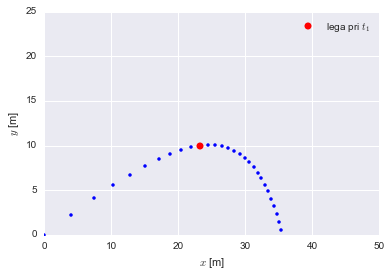

In [349]:
interact(slika, v0 = (1, 70, 3), kot = (1, 89, 2), c = (0.05, 0.5, 0.05));

#### Primer 1a: spreminjanje začetne hitrosti za doseganje razdalje $x$

Definirajmo funkcijo mejnega preostanka:

In [350]:
def R(v0=30, alpha = 30*np.pi/180, c=0.25, t1=1, ciljni_x_pri_t1=20):
    y_zacetni_pogoji = np.array([0, v0*np.cos(alpha), 0, v0*np.sin(alpha)])
    t = np.linspace(0, t1, 100)
    y_ode = odeint(F, y_zacetni_pogoji, t, args=(c,))
    return y_ode[-1, 0]-ciljni_x_pri_t1

Poiščimo ničlo mejnega preostanka (zelo pomemben je dober začetni približek!):

In [351]:
import scipy.optimize as optimize

In [352]:
optimize.newton(R, 20)

#### Primer 1b: spreminjanje začetnih pogojev za doseganje $x$ in $y$

Poglejmo si sedaj spreminjanje dveh začetnih pogojev za doseganje ciljne lege $x, y$:

In [353]:
def R2(x = [30, 45], c=0.25, t1=1, x_pri_t1=[20, 0]):
    v0 = x[0]
    alpha = x[1]*np.pi/180
    y_zacetni_pogoji = np.array([0, v0*np.cos(alpha), 0, v0*np.sin(alpha)])
    t = np.linspace(0, t1, 100)
    y_ode = odeint(F, y_zacetni_pogoji, t, args=(c,))
    return [y_ode[-1, 0] - x_pri_t1[0], y_ode[-1, 2] - x_pri_t1[1]]

In [354]:
R2()

In [355]:
sol = optimize.root(R2, [20, 30])

In [356]:
sol.x

array([ 35.33628187,   9.96528608])

### Primer 2: nosilec z obremenitvijo

Poglejmo si primer (Numerical Methods in Engineering With Python 3, Third Ed., Jaan Kiusalaas, stran 300):
<img src='./fig/Jaan Kiusalaas stran 300 example 8.4.png' width=300>

#### Simbolna rešitev

Diferencialna enačba, ki popisuje problem je:

In [357]:
import sympy as sym
sym.init_printing()

In [358]:
v, x, EI, w0, L = sym.symbols('v, x, EI, w0, L')

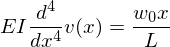

In [359]:
eq = sym.Eq(EI*v(x).diff(x,4), w0*x/L)
eq

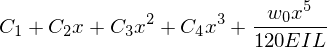

In [360]:
sol = sym.dsolve(eq).args[1]
sol

In [361]:
sol.subs(x, 0)

In [362]:
sol.diff(x, 2).subs(x, 0)

In [363]:
c1c3 = {'C1': 0, 'C3': 0}

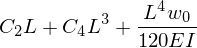

In [364]:
eq1 = sol.subs(c1c3).subs(x, L)
eq1

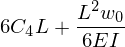

In [365]:
eq2 = sol.diff(x, 2).subs(c1c3).subs(x, L)
eq2

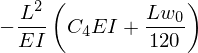

In [366]:
C2 = sym.solve(eq1, 'C2')[0]
C2

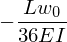

In [367]:
C4 = sym.solve(
      eq2.subs('C2', C2),
      'C4'
     )[0]
C4

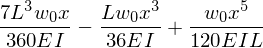

In [368]:
resitev = sol.subs(c1c3).subs('C2', C2).subs('C4', C4)
resitev

In [369]:
podatki = {EI: 2.1e11*0.4, L: 20, w0:-100e3}

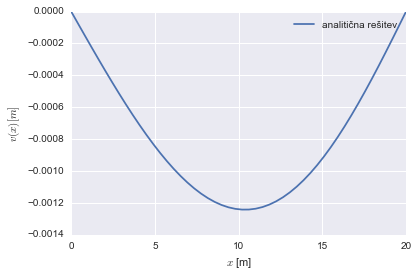

In [370]:
x_ana = np.linspace(0, podatki[L], 50)
v_ana = [resitev.subs(podatki).evalf(subs={x: _}) for _ in x_ana]
plt.plot(x_ana, v_ana, label='analitična rešitev')
plt.legend()
plt.xlabel('$x$ [m]')
plt.ylabel('$v(x) [m]$');

#### Numerična rešitev

Poglejmo si sedaj numerično rešitev. Za diferencialno enačbo:

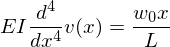

In [371]:
eq

imamo podane robne pogoje (členkasto vpet nosilec):
$$v(0)=v(L)=0\quad\textrm{in}\quad v''(0)=v''(L)=0$$

Dva začetna pogoja imamo podana; če želimo rešiti glede na začetne pogoje, rabimo torej še dva dodatna začetna pogoja:
$$v'(0)=u_0\quad\textrm{in}\quad v'''(0)=u_1,$$
ki bosta zadostila zgornje robne pogoje.

Mejni preostanek je definiran kot (seznam $x$ predstavlja dodatna začetna pogoja):

In [372]:
x = np.linspace(0, 20, 3)

def R(x0=[-1e-3, 1], L=x[-1], v_L=0, ddv_L=0):
    dv, dddv = x0
    y_zacetni_pogoji = np.array([0, dv, 0, dddv])
    y_ode = odeint(F, y_zacetni_pogoji, x)
    return [y_ode[-1, 0]-v_L, y_ode[-1, 2]-ddv_L]

In [373]:
def F(y, x, EI=2.1e11*0.4, L=20, w0=-100e3):
    # y = [v0, v1, v2, v3]
    return np.array([y[1], y[2], y[3], w0*x/(EI*L)])
    #return np.array([y[1], y[2], y[3], w0*(L-x)/(EI*L)])#obrnjena rampa
    #return np.array([y[1], y[2], y[3], w0*L*np.sin(np.pi*x/L)/(EI*L)]) #polsinus

In [374]:
R()

In [380]:
sol = optimize.root(R, [-1e-6, 1])
sol.x

array([ -1.85180482e-04,   3.96824648e-06])

Napaka:

In [383]:
R(x0=sol.x)

Prikažimo rezultat

In [376]:
y_zacetni_pogoji = np.array([0, sol.x[0], 0, sol.x[1]])
y_ode = odeint(F, y_zacetni_pogoji, x)

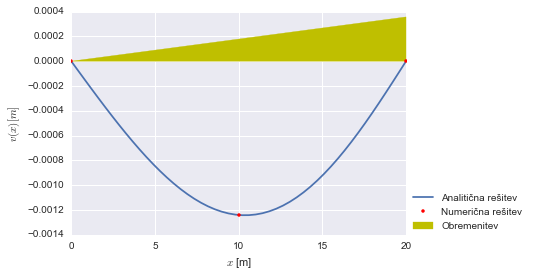

In [377]:
plt.plot(x_ana, v_ana, label='Analitična rešitev')
plt.plot(x, y_ode[:, 0], 'r.', label='Numerična rešitev')
plt.fill_between(x, 0, [-300*F(y_zacetni_pogoji, _)[-1] for _ in x], color='y', label='Obremenitev')
plt.xlabel('$x$ [m]')
plt.ylabel('$v(x) [m]$')
plt.legend(loc=(1.01, 0))
plt.show();

# 3. Metoda končnih razlik

Ponovno si poglejmo zgornjo diferencialno enačbo četrtega reda:

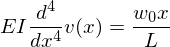

In [288]:
eq

S pomočjo centralne diferenčne sheme lahko za $i$-to točko zapišemo:
$$1\,v_{i-2} - 4\,v_{i-1} + 6\,v_{i} - 4\,v_{i+1} + 1\, v_{i+2} = \frac{h^{4}\, w_{0} x_{i}}{E\,I\,L}.$$

Če je vseh točk $n$, lahko dodatne robne pogoje pri zgornjem primeru zapišemo enačbe:
$$v_0=v(0)=0$$
in
$$v_{n-1}=v(L)=0$$

Iz preostalih robnih pogojev pa sledita enačbi:
$$v''(0)=0\qquad\rightarrow\qquad -v_{-1}+2\,v_0-v_1=0$$
in
$$v''(L)=0\qquad\rightarrow\qquad -v_{n-2}+2\,v_{n-1}-v_n=0$$

**Sledi** torej, da moramo v obravnavani sistem vpeljati dve namišljene točke $v_{-1}$ in $v_n$.

Poglejmo si v nadaljevanju numerični zgled.

#### Numerični zgled

Najprej diskretizirajmo neodvisno spremenljivko ``x_a`` (najmanjše število fizikalnih točk je 3, ob razširitvi z dvema navideznima, bomo imeli točk 5):

In [289]:
tock = 3
x_a = np.linspace(0, podatki[L], tock)
h = x_a[1]
x_a[:10]

array([  0.,  10.,  20.])

ter pripravimo obremenitev ``w_a`` in vektor konstant ``b``:

In [290]:
w_a = podatki[w0]*x_a
#w_a = podatki[w0]*np.sin(np.pi*x_a/podatki[L])*np.max(x_a) #polsinusna obremenitev
b = w_a*h**4/(podatki[EI]*podatki[L])
b[:10]

array([-0.        , -0.00595238, -0.01190476])

Sedaj pripravimo še matriko koeficientov; ker uporabimo centralno diferenčno shemo, nam nekaj težav povzročajo točke na robovih in ta del bomo najprej izpustili:

In [291]:
from scipy.misc import central_diff_weights as cdw
A2 = np.zeros((tock+2, tock+2))
shema4_tock = 5
shema4 = cdw(shema4_tock, 4)
shema4

array([ 1., -4.,  6., -4.,  1.])

In [292]:
for i in range(len(A2)-4):
     A2[i+2, i:i+shema4_tock] = shema4
A2

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  6., -4.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

Dodamo robna pogoja $v(0)=v(L)=0$:

In [293]:
A2[1,1] = 1
A2[-2,-2] = 1
A2

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1., -4.,  6., -4.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

in še robna pogoja $v''(0)=v''(L)=0$:

In [294]:
A2[0, :3] = np.array([1, -2, 1])
A2[-1, -3:] = np.array([1, -2, 1])
A2

array([[ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1., -4.,  6., -4.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.]])

Ustrezno popravimo vektor konstant:

In [295]:
b2 = np.zeros(len(A2))
b2[2:-2] = b[1:-1]

In [296]:
b2[:10]

array([ 0.        ,  0.        , -0.00595238,  0.        ,  0.        ])

Spomnimo se, da rešujemo: 
$$\mathbf{A}_2\,\mathbf{v}=\mathbf{b}_2,$$
kjer je vektor neznanih pomikov $\mathbf{v}$. 

$\mathbf{A}_2$ je z dvema navideznima točkama razširjena matrika koeficientov in $\mathbf{b}_2$ razširjen vektor konstant.

In [297]:
np.linalg.cond(A2)

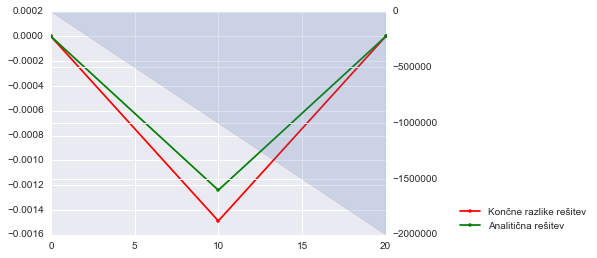

In [298]:
v_mkr = np.linalg.solve(A2, b2)[1:-1]
x = sym.symbols('x') # zgoraj smo prepisali to spremenljivko, zato jo ponovno definiramo
v_ana = [resitev.subs(podatki).evalf(subs={x: _}) for _ in x_a]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x_a, v_mkr, 'r.-', label='Končne razlike rešitev')
ax1.plot(x_a, v_ana, 'g.-', label='Analitična rešitev');
ax2.fill_between(x_a, w_a, 0, alpha=0.2)
ax1.legend(loc=(1.21,0.));

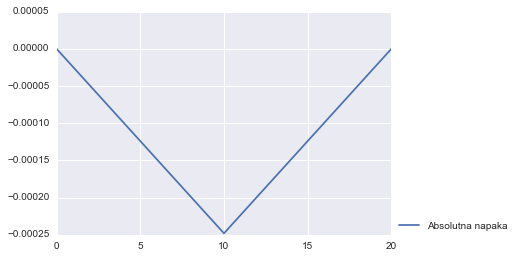

In [299]:
plt.plot(x_a, v_mkr-v_ana, label='Absolutna napaka')
plt.legend(loc=(1.01, 0));